# コード2-1：関数プロットの実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

このコードでは第２章で紹介される生命現象を記述する各種関数（方程式）を図にプロットする例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み込み

- ggplot2 https://ggplot2.tidyverse.org/
- patchwork https://patchwork.data-imaginist.com/

In [67]:
## 必要があればインストール
# install.packages(c("ggplot2", "patchwork"))

In [59]:
rm(list = ls(all = TRUE))
library(ggplot2)
library(patchwork)

## 散布図のプロット

In [2]:
## プロットするデータ
data_plot <- data.frame(x = c(1, 2, 3, 4, 5), y = c(2, 5, 1, 3, 5))

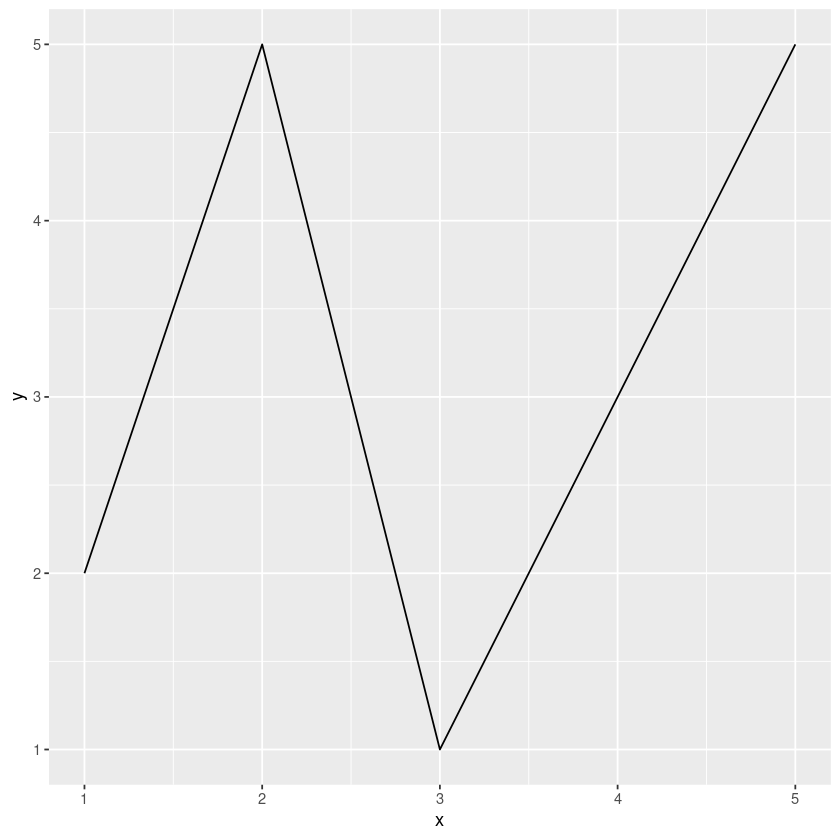

In [4]:
## matplotlibパッケージの中のpyplotモジュールのplot関数を使ったプロット
## 折れ線グラフ
ggplot(data = data_plot, aes(x = x, y = y)) + geom_line()

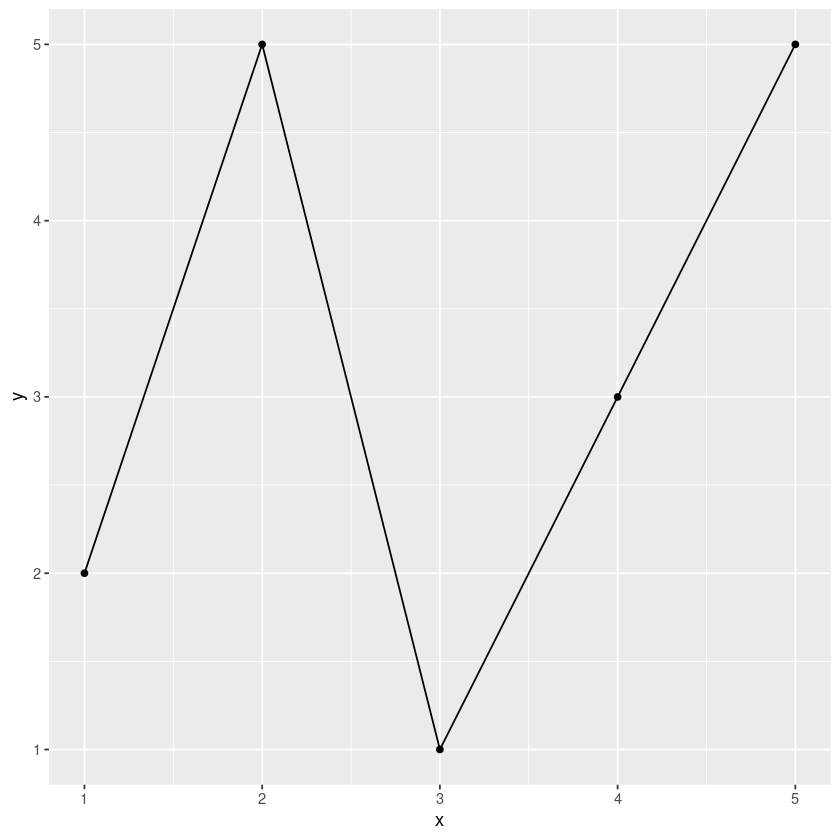

In [5]:
## 各データをマーカーで表示
ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_line() +
    geom_point()

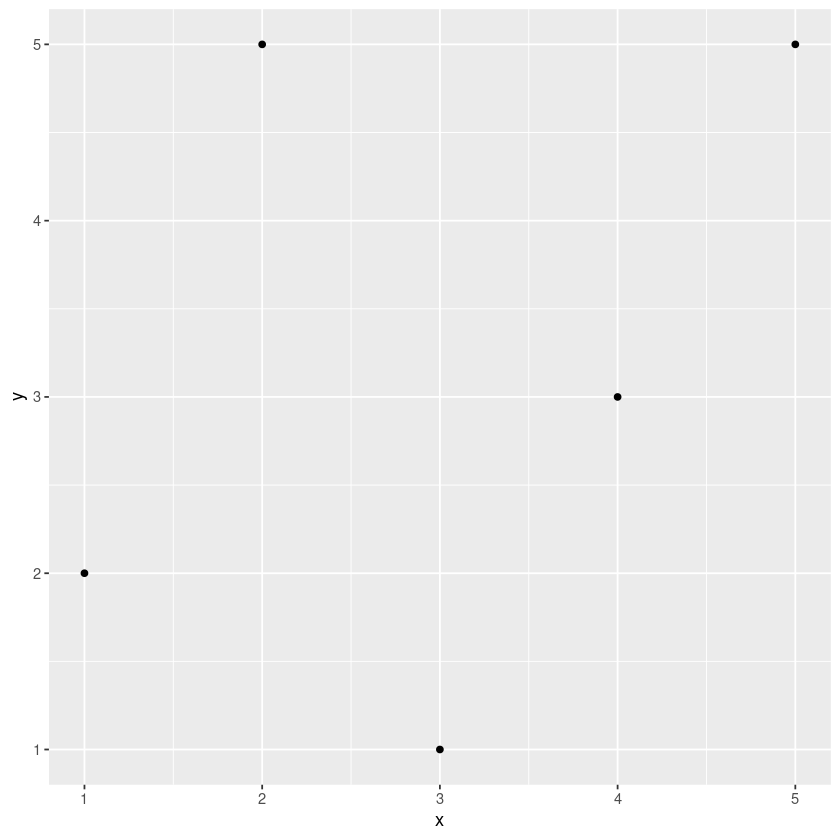

In [6]:
## マーカーだけにする
ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_point()

## 指数関数のプロット

### 指数関数のプロット１

式(2.2)

$$
V(t) = V \left( 0 \right) \exp \left( G t \right)
$$

について、$V \left( 0 \right) = 100, G = 0.5$の場合と、$V \left( 0 \right) = 5, G = 1.5$の場合をプロットする。

In [7]:
## パラメータの定義
v01 <- 100 ## V(0)
g1 <- 0.5 ## G

v02 <- 5 ## V(0)
g2 <- 1.5 ## G

In [14]:
## データの準備
t1 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v1 <- c() ## 空のベクトル

t2 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v2 <- c() ## 空のベクトル

## 各tに対応するv(t)の値の生成
### length(x): ベクトルxの長さ（要素数）
for (i in 1:length(t1)) {
    v1 <- c(v1, v01*exp(g1*t1[i]))
}

for (i in 1:length(t2)) {
    v2 <- c(v2, v02*exp(g2*t2[i]))
}

## プロット用のデータフレーム
data_plot <- data.frame(x = c(t1, t2), y = c(v1, v2), label = c(rep("v1", length(v1)), rep("v2", length(v2))))

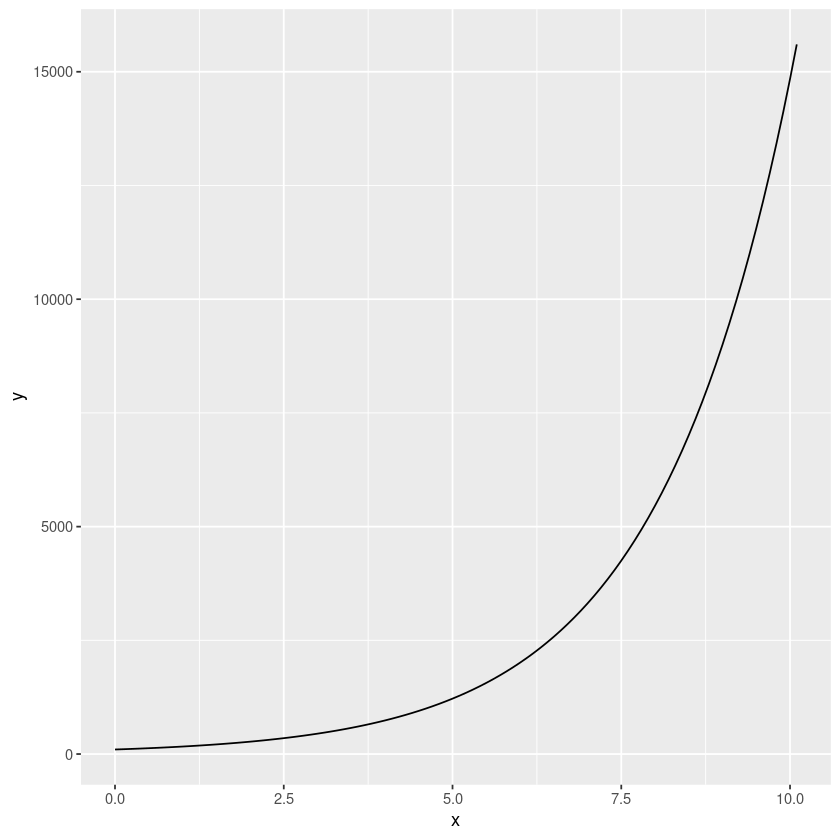

In [15]:
## 折れ線グラフでプロット
## 小刻みにプロットすることで滑らかな指数関数の曲線がプロットできる
ggplot(data = subset(data_plot, label == "v1"), aes(x = x, y = y)) +
    geom_line()

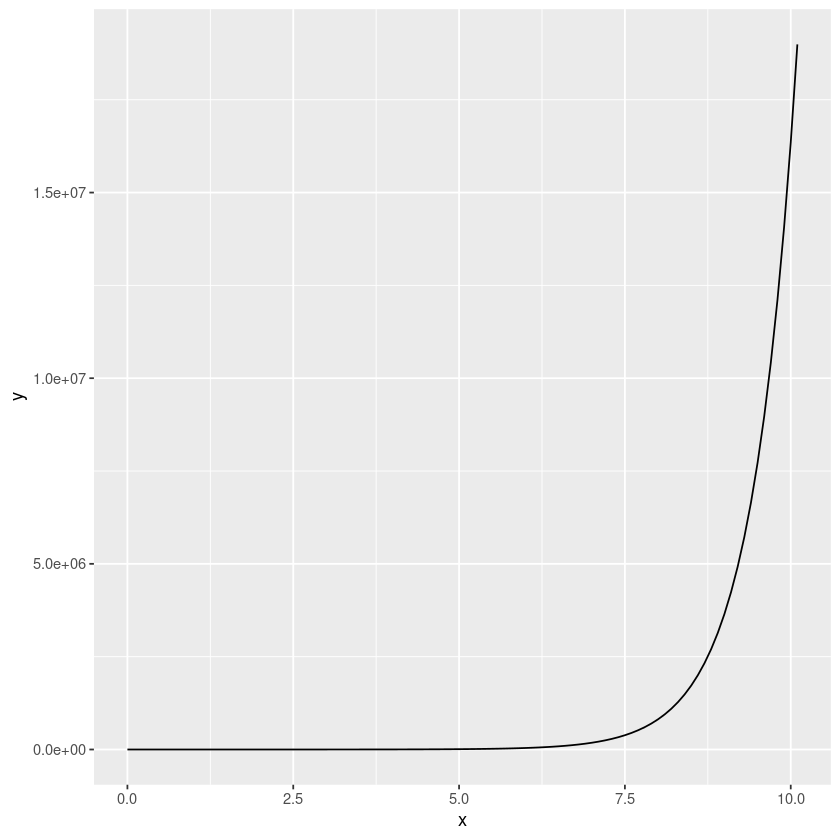

In [16]:
ggplot(data = subset(data_plot, label == "v2"), aes(x = x, y = y)) +
    geom_line()

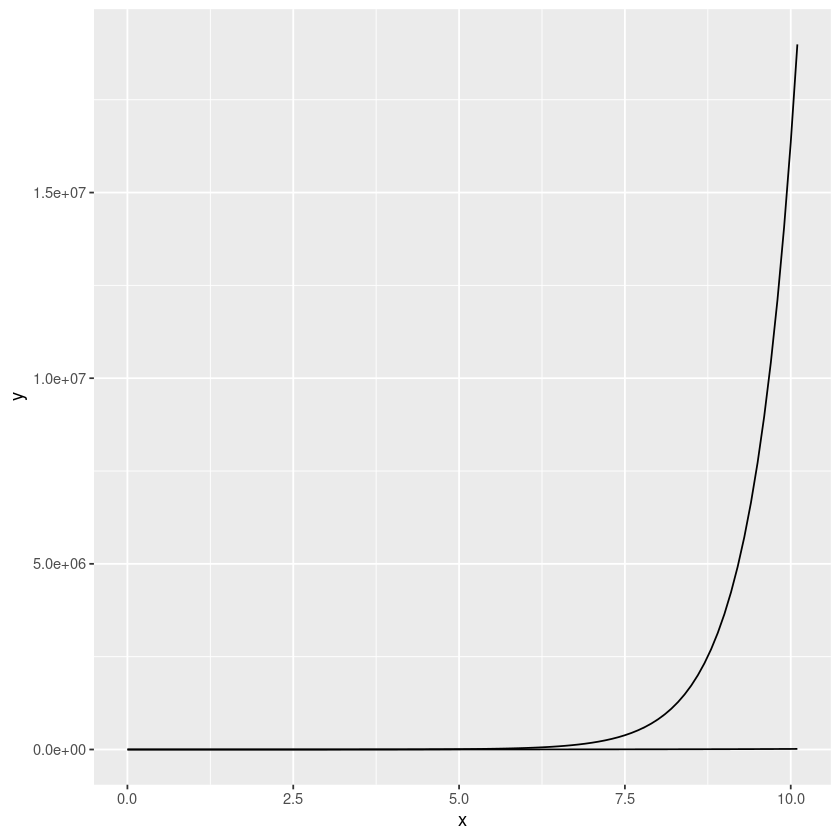

In [17]:
## 重ねてプロット
ggplot(data = data_plot, aes(x = x, y = y, group = label)) +
    geom_line()

### 指数関数のプロット２

式(2.4)

$$
V(t) = V \left( 0 \right) \exp \left( -D t \right)
$$

について、$V \left( 0 \right) = 100, D = 1.5$の場合と、$V \left( 0 \right) = 5, D = 0.5$の場合をプロットする。

In [18]:
## パラメータの定義
v01 <- 100 ## V(0)
d1 <- 1.5 ## D

v02 <- 5 ## V(0)
d2 <- 0.5 ## D

In [19]:
## データの準備
t1 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v1 <- c() ## 空のベクトル

t2 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v2 <- c() ## 空のベクトル

## 各tに対応するv(t)の値の生成
### length(x): ベクトルxの長さ（要素数）
for (i in 1:length(t1)) {
    v1 <- c(v1, v01*exp(-d1*t1[i]))
}

for (i in 1:length(t2)) {
    v2 <- c(v2, v02*exp(-d2*t2[i]))
}

## プロット用のデータフレーム
data_plot <- data.frame(x = c(t1, t2), y = c(v1, v2), label = c(rep("v1", length(v1)), rep("v2", length(v2))))

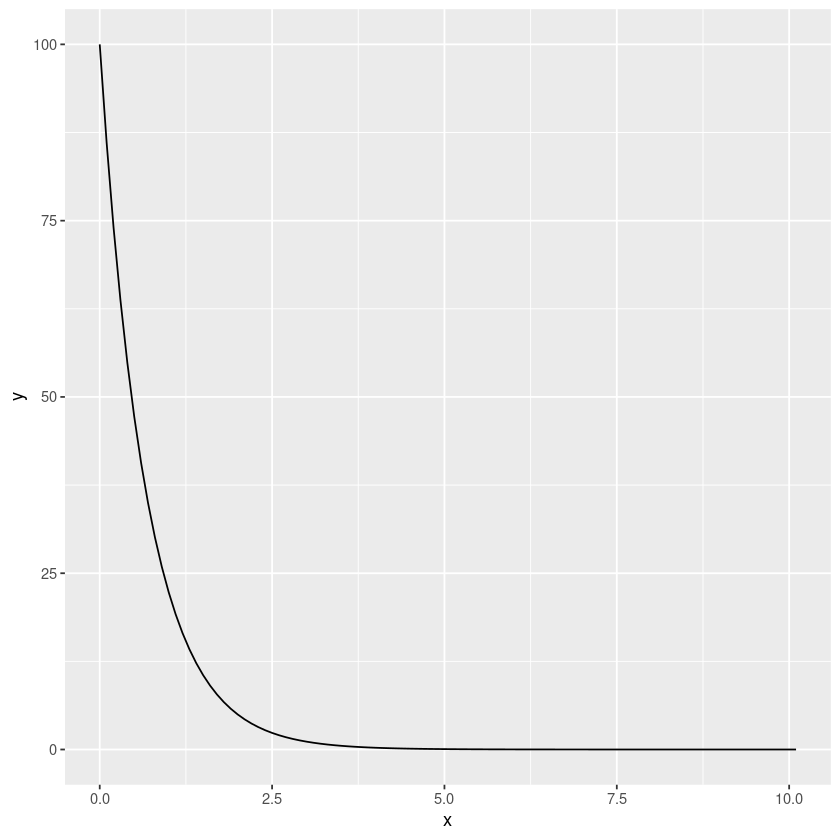

In [20]:
ggplot(data = subset(data_plot, label == "v1"), aes(x = x, y = y)) +
    geom_line()

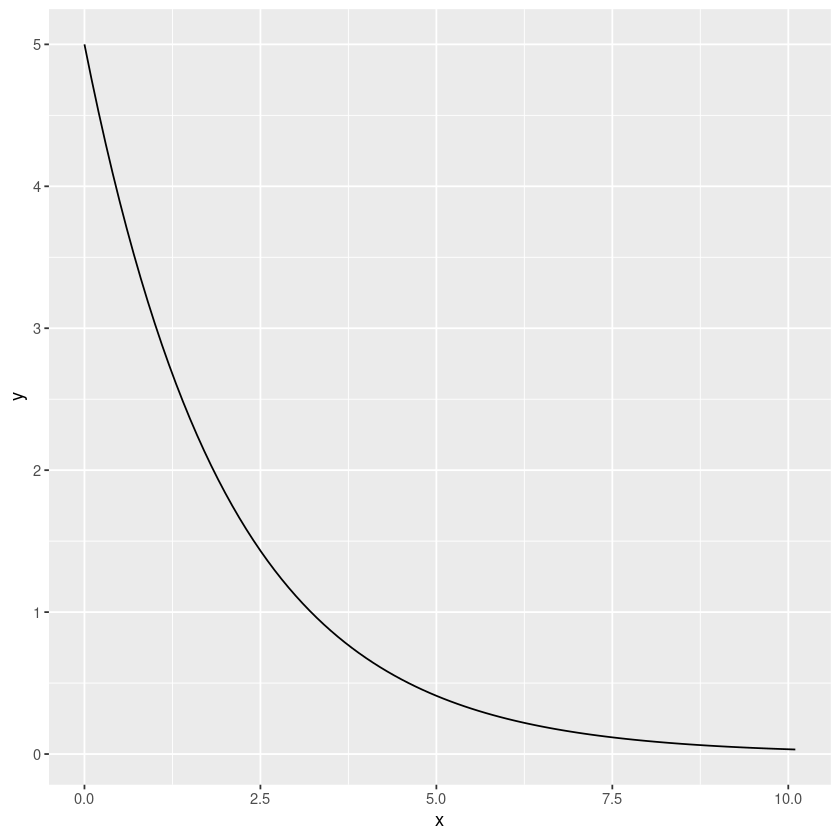

In [21]:
ggplot(data = subset(data_plot, label == "v2"), aes(x = x, y = y)) +
    geom_line()

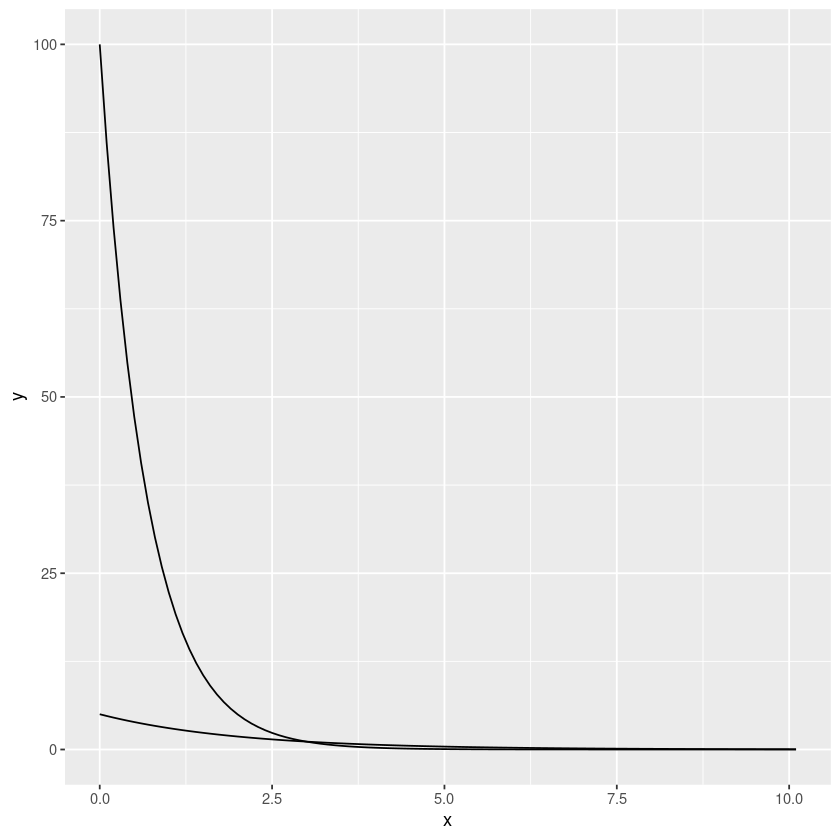

In [22]:
ggplot(data = data_plot, aes(x = x, y = y, group = label)) +
    geom_line()

## 指数関数を対数変換した式のプロット

前節の式(2.4)を対数変換した式(2.5)

$$
\log V \left( t \right) = \log V \left( 0 \right) - D t
$$

について、$V \left( 0 \right) = 100, D = 1.5$の場合と、$V \left( 0 \right) = 5, D = 0.5$の場合をプロットする。

In [23]:
## パラメータの定義
v01 <- 100 ## V(0)
d1 <- 1.5 ## D

v02 <- 5 ## V(0)
d2 <- 0.5 ## D

In [24]:
## データの準備
t1 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v1 <- c() ## 空のベクトル

t2 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v2 <- c() ## 空のベクトル

## 各tに対応するv(t)の値の生成
### length(x): ベクトルxの長さ（要素数）
for (i in 1:length(t1)) {
    v1 <- c(v1, log(v01*exp(-d1*t1[i])))
}

for (i in 1:length(t2)) {
    v2 <- c(v2, log(v02*exp(-d2*t2[i])))
}

## プロット用のデータフレーム
data_plot <- data.frame(x = c(t1, t2), y = c(v1, v2), label = c(rep("v1", length(v1)), rep("v2", length(v2))))

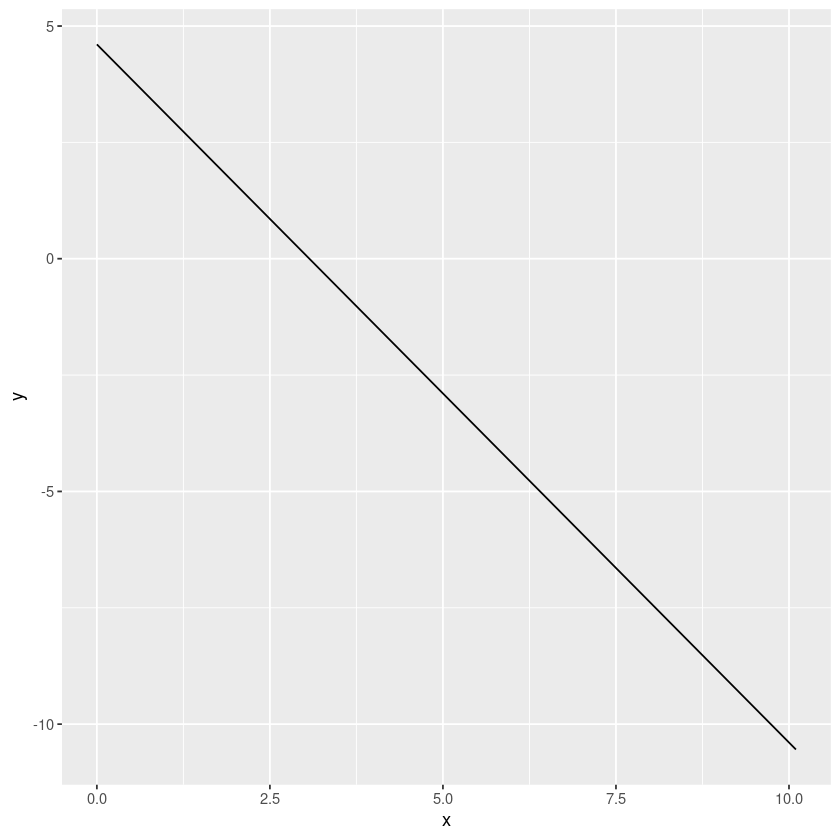

In [25]:
ggplot(data = subset(data_plot, label == "v1"), aes(x = x, y = y)) +
    geom_line()

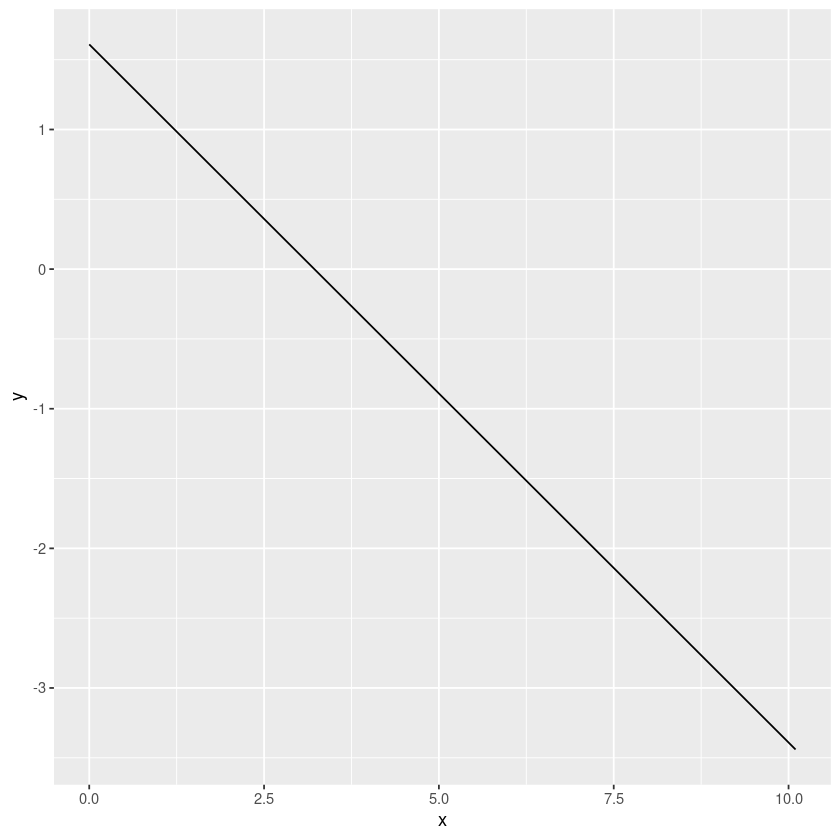

In [26]:
ggplot(data = subset(data_plot, label == "v2"), aes(x = x, y = y)) +
    geom_line()

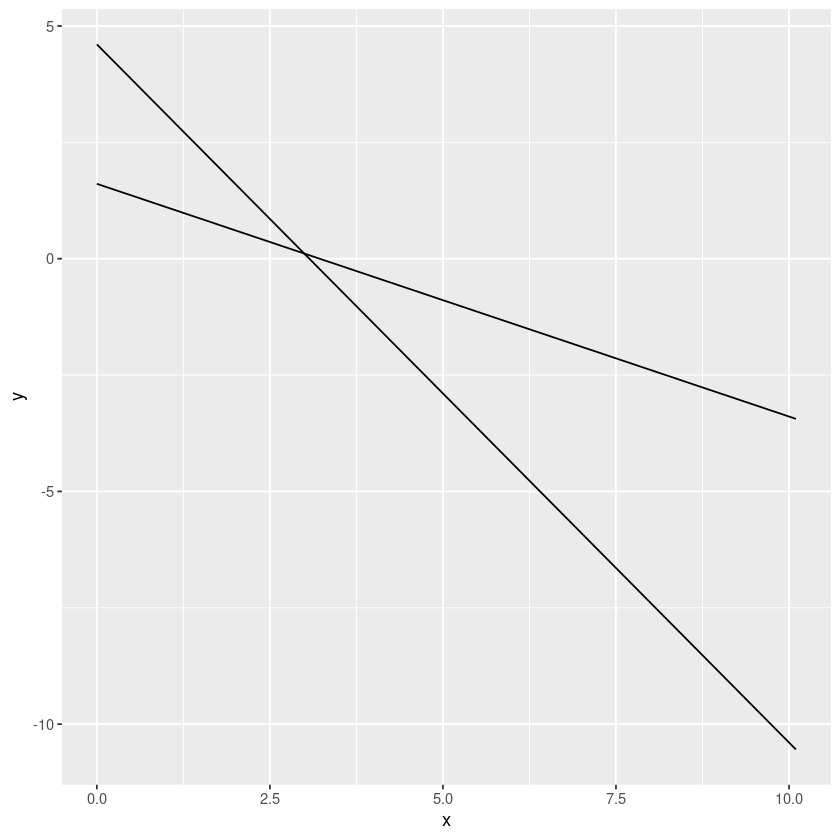

In [27]:
ggplot(data = data_plot, aes(x = x, y = y, group = label)) +
    geom_line()

## ロジスティック関数のプロット

式(2.7)

$$
\frac{d V \left( t \right)}{d t} = G V \left( t \right) \left( 1 - \frac{V \left( t \right)}{K_{V}} \right)
$$

の解、

$$
V \left( t \right) =
   \frac
   {V \left( 0 \right) K_{V} \exp \left( G t\right)}
   {K_{V} - V \left( 0 \right) + V \left( 0 \right) \exp \left( G t \right)}
$$

について、
- $V \left( 0 \right) = 1, G = 1.5, K_{V} = 100$
- $V \left( 0 \right) = 50, G = 0.5, K_{V} = 100$
- $V \left( 0 \right) = 150, G = 0.5, K_{V} = 100$

をプロットする。

参考：[ロジスティック方程式 \- Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E6%96%B9%E7%A8%8B%E5%BC%8F)

In [29]:
## パラメータの定義
v01 <- 1; g1 <- 1.5; kv1 <- 100
v02 <- 50; g2 <- 0.5; kv2 <- 100
v03 <- 150; g3 <- 0.5; kv3 <- 100

In [32]:
## データの準備
t1 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v1 <- c() ## 空のベクトル

t2 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v2 <- c() ## 空のベクトル

t3 <- seq(0, 10.1, by = 0.1) ## 0から10までの0.1刻みの数のベクトル
v3 <- c() ## 空のベクトル

## 各tに対応するv(t)の値の生成
### length(x): ベクトルxの長さ（要素数）
for (i in 1:length(t1)) {
    v1 <- c(v1, (v01*kv1*exp(g1*t1[i]))/(kv1 - v01 + v01*exp(g1*t1[i])))
}

for (i in 1:length(t2)) {
    v2 <- c(v2, (v02*kv2*exp(g2*t2[i]))/(kv2 - v02 + v02*exp(g2*t2[i])))
}

for (i in 1:length(t3)) {
    v3 <- c(v3, (v03*kv3*exp(g3*t3[i]))/(kv3 - v03 + v03*exp(g3*t3[i])))
}

## プロット用のデータフレーム
data_plot <- data.frame(x = c(t1, t2, t3), y = c(v1, v2, v3),
                        label = c(rep("v1", length(v1)), rep("v2", length(v2)), rep("v3", length(v3))))

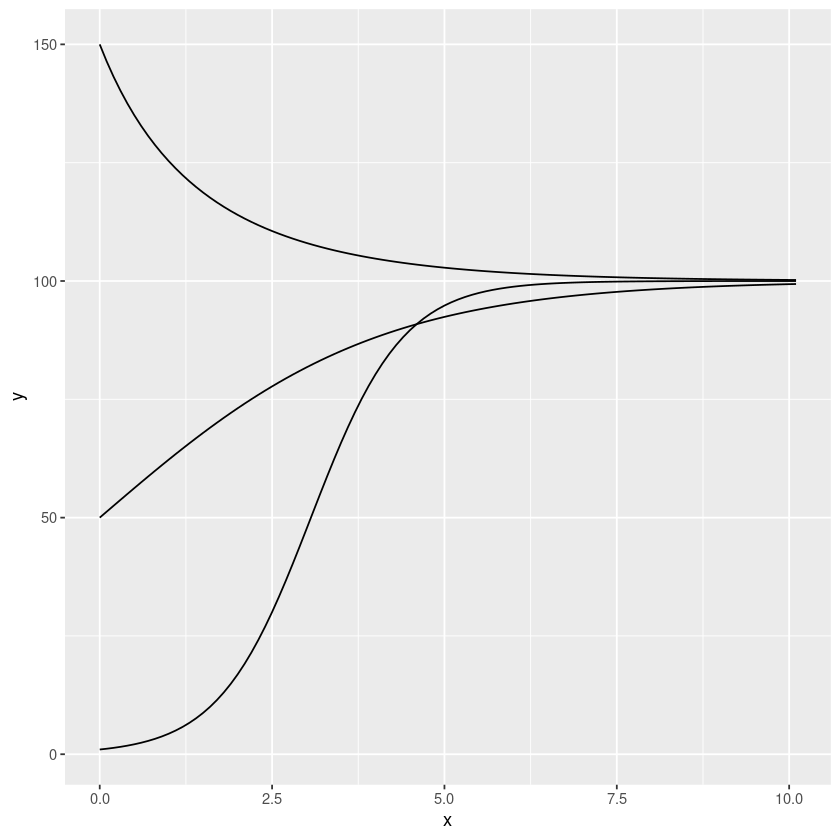

In [33]:
ggplot(data = data_plot, aes(x = x, y = y, group = label)) +
    geom_line()

## プロットをきれいにする

デフォルトのプロットのスタイルを少し変えてみる。
- 色を変える
- 線を変える
- マーカーを変える
- 軸の上限、下限を変える
- レジェンドを消す
- タイトルを加える、軸のラベルを変更

参考：ggplot2 extensions - gallery https://exts.ggplot2.tidyverse.org/gallery/

In [35]:
## プロットするデータ
x <- c(1, 2, 3, 4, 5)
y1 <- c(2, 5, 1, 3, 5)
y2 <- c(1, 3, 8, 4, 1)

data_plot <- data.frame(x = rep(x, 2), y = c(y1, y2), label = rep(c("y1", "y2"), each = length(x)))

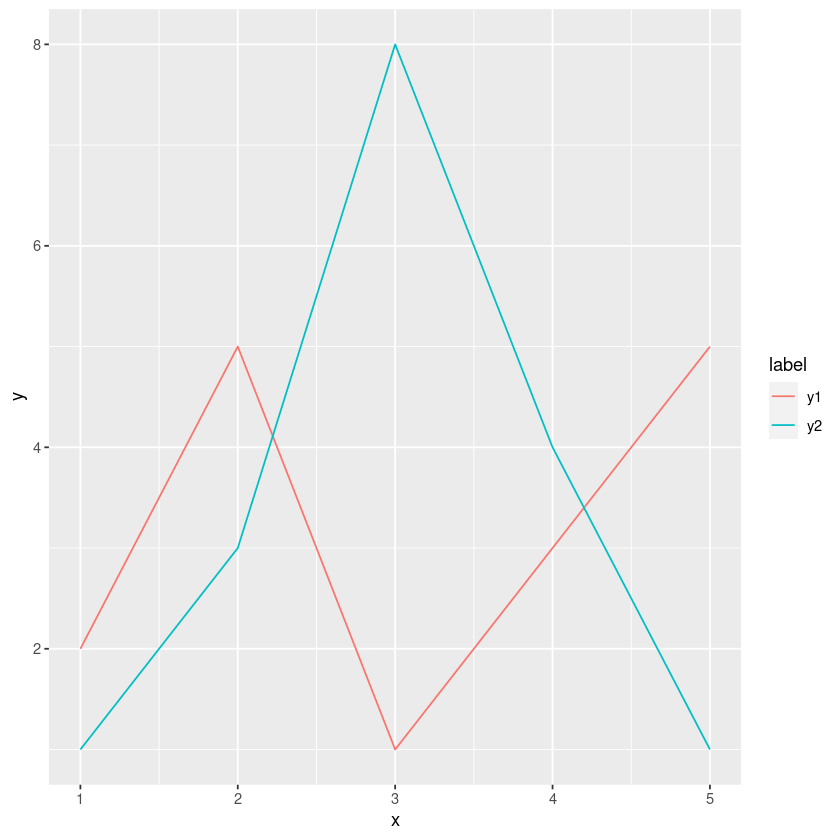

In [36]:
## 色分けデフォルト
ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line()

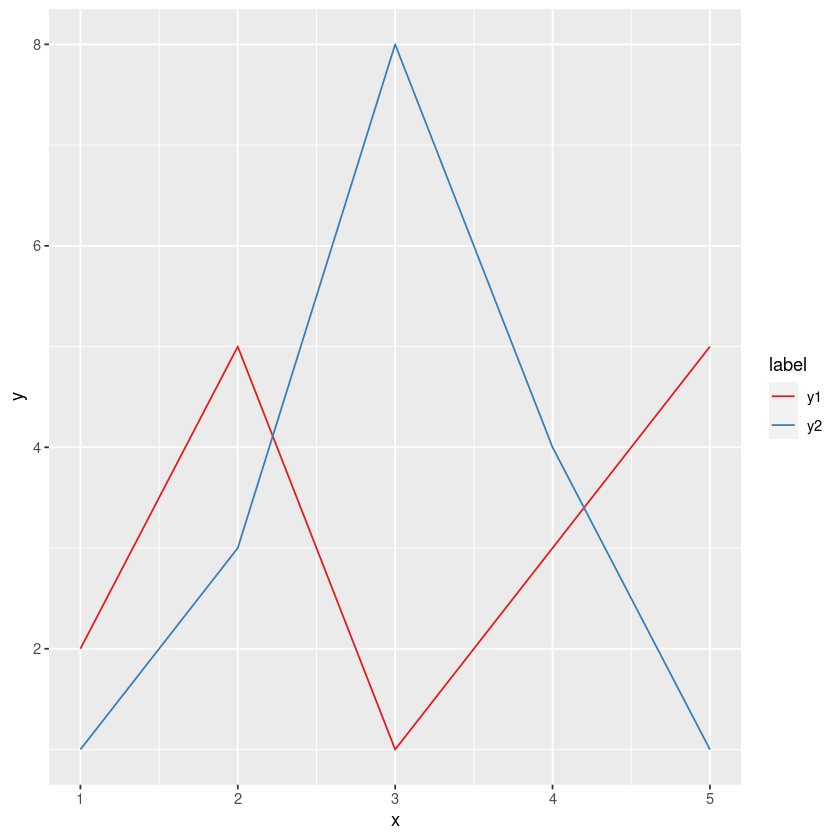

In [50]:
## 色を変える
### 既存の色を使う
ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line() +
    scale_color_brewer(palette = "Set1")

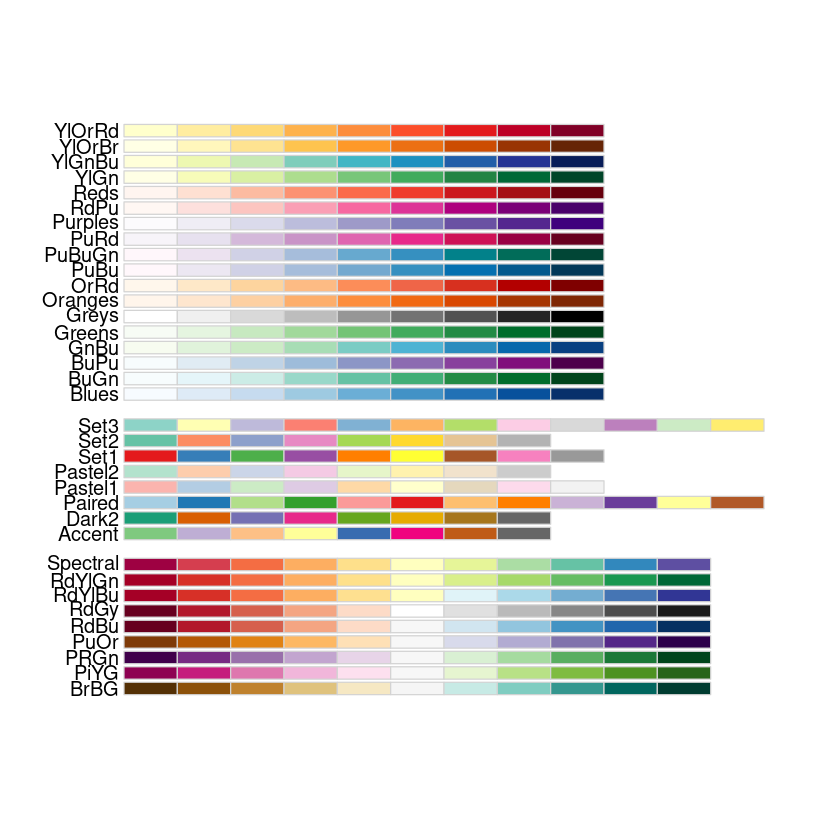

In [51]:
RColorBrewer::display.brewer.all()

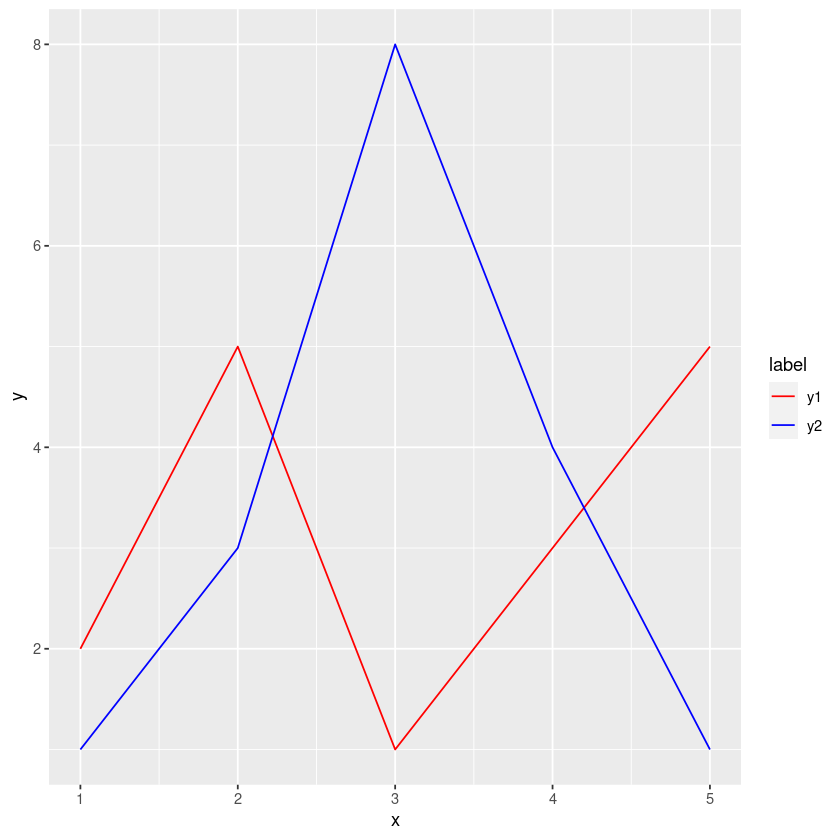

In [52]:
## 色を変える
### 指定した色を使う

color_manual <- c(y1 = "red", y2 = "blue")

ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line() +
    scale_color_manual(values = color_manual)

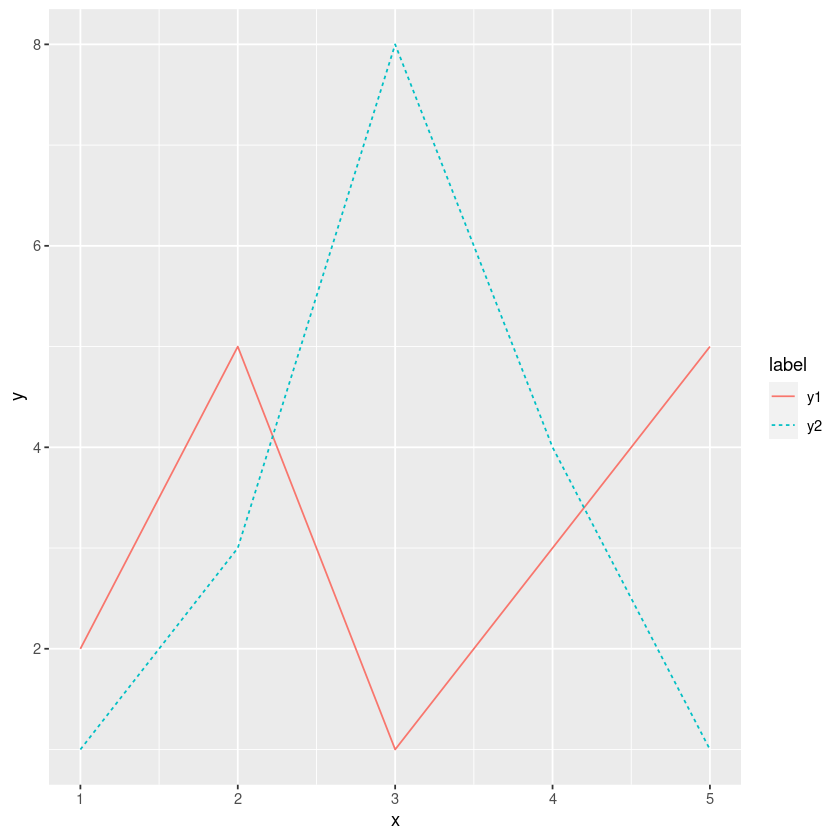

In [53]:
## 線の種類を変える
ggplot(data = data_plot, aes(x = x, y = y, color = label, linetype = label)) +
    geom_line()

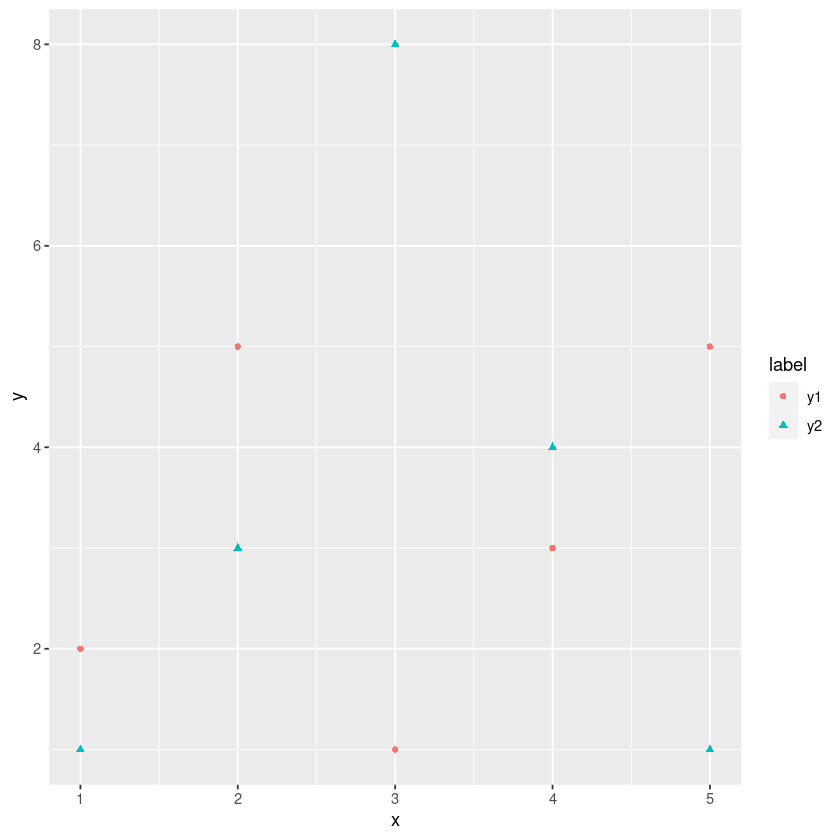

In [54]:
## マーカーの種類を変える
ggplot(data = data_plot, aes(x = x, y = y, color = label, shape = label)) +
    geom_point()

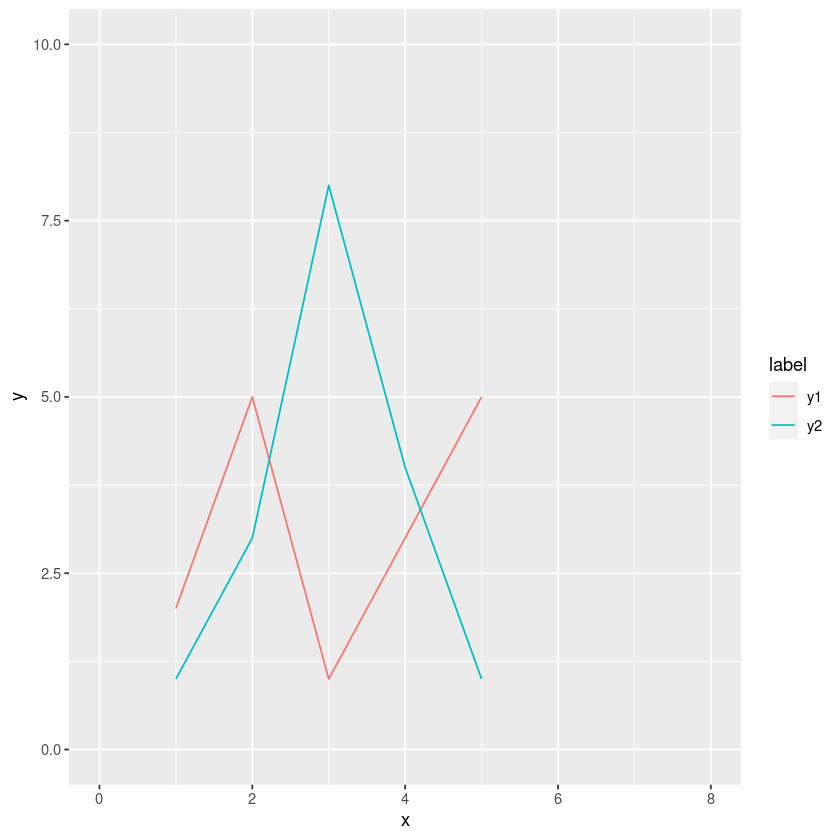

In [55]:
## 軸の上限、下限を変える
ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line() +
    scale_x_continuous(limits = c(0, 8)) +
    scale_y_continuous(limits = c(0, 10))

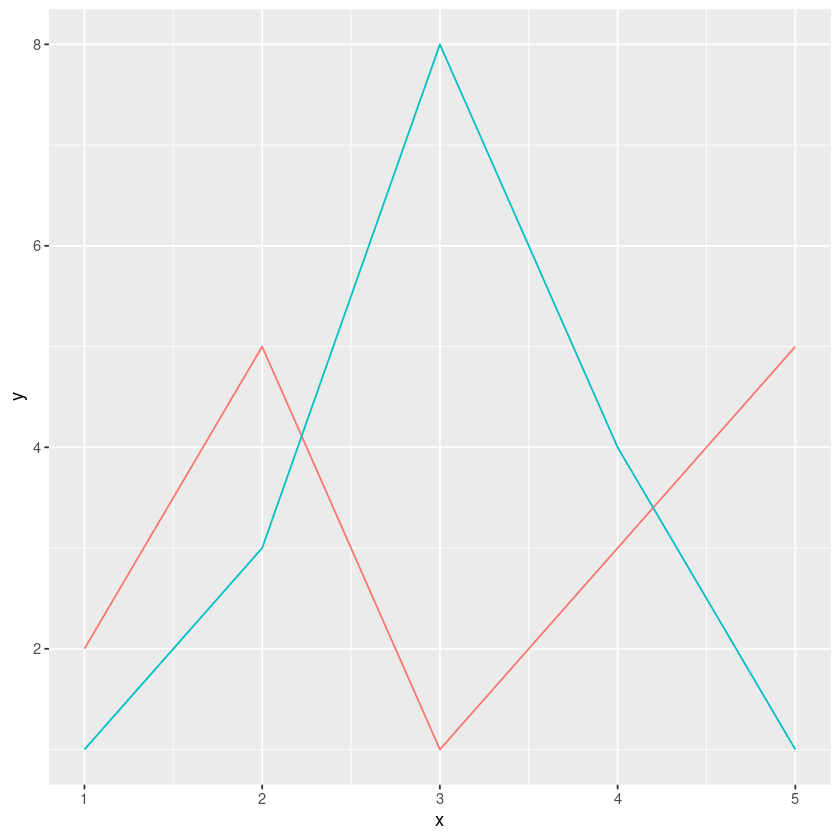

In [56]:
## レジェンドを消す
ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line() +
    theme(legend.position = 'none')

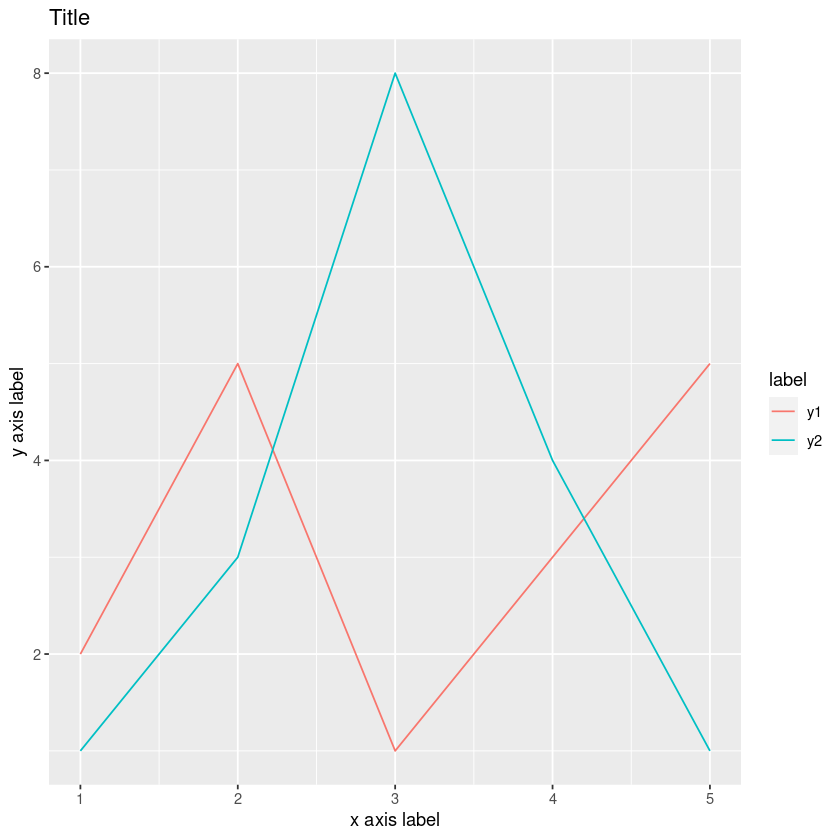

In [57]:
## タイトルを加える、軸のラベルを変更
ggplot(data = data_plot, aes(x = x, y = y, color = label)) +
    geom_line() +
    labs(title = "Title") +
    xlab("x axis label") +
    ylab("y axis label")

## 図を並べる

複数枚の図を１枚の図に並べる。

https://patchwork.data-imaginist.com/

In [61]:
## プロットするデータ
x <- c(1, 2, 3, 4, 5)
y1 <- c(2, 5, 1, 3, 5)
y2 <- c(1, 3, 8, 4, 1)
y3 <- c(5, 5, 1, 5, 3)
y4 <- c(6, 1, 3, 1, 4)

data_plot <- data.frame(x = rep(x, 4), y = c(y1, y2, y3, y4),
                       label = rep(c("y1", "y2", "y3", "y4"), each = length(x)))

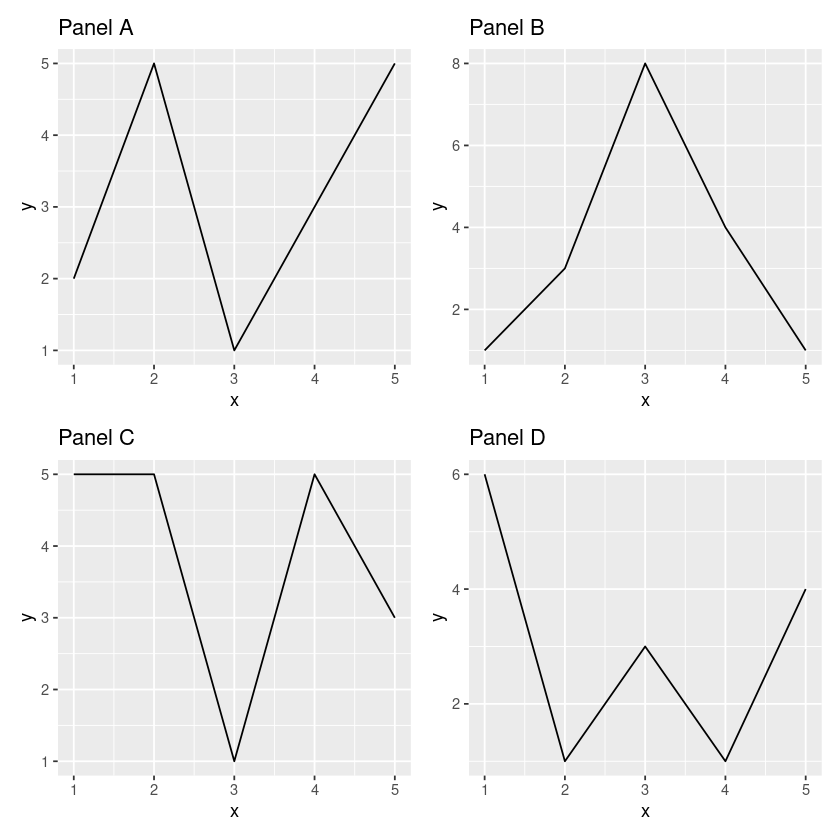

In [63]:
## 1枚目
p1 <- ggplot(data = subset(data_plot, label == "y1"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel A")

## 2枚目
p2 <- ggplot(data = subset(data_plot, label == "y2"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel B")

## 3枚目
p3 <- ggplot(data = subset(data_plot, label == "y3"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel C")

## 4枚目
p4 <- ggplot(data = subset(data_plot, label == "y4"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel D")

p1 + p2 + p3 + p4

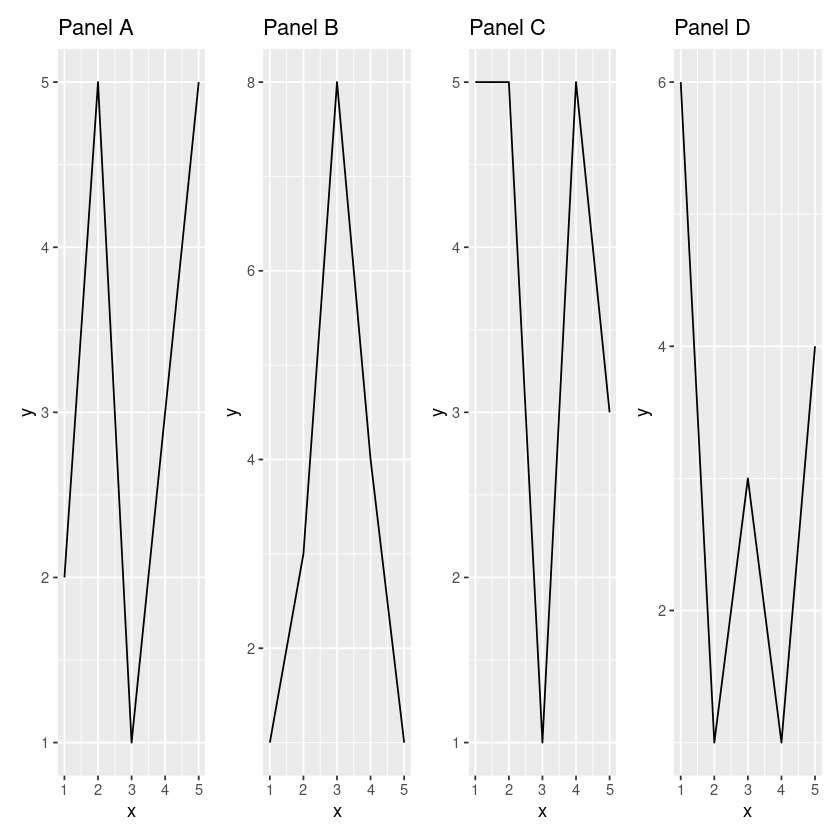

In [64]:
## 1枚目
p1 <- ggplot(data = subset(data_plot, label == "y1"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel A")

## 2枚目
p2 <- ggplot(data = subset(data_plot, label == "y2"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel B")

## 3枚目
p3 <- ggplot(data = subset(data_plot, label == "y3"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel C")

## 4枚目
p4 <- ggplot(data = subset(data_plot, label == "y4"), aes(x = x, y = y)) +
    geom_line() +
    labs(title = "Panel D")

p1 + p2 + p3 + p4 + plot_layout(nrow = 1)

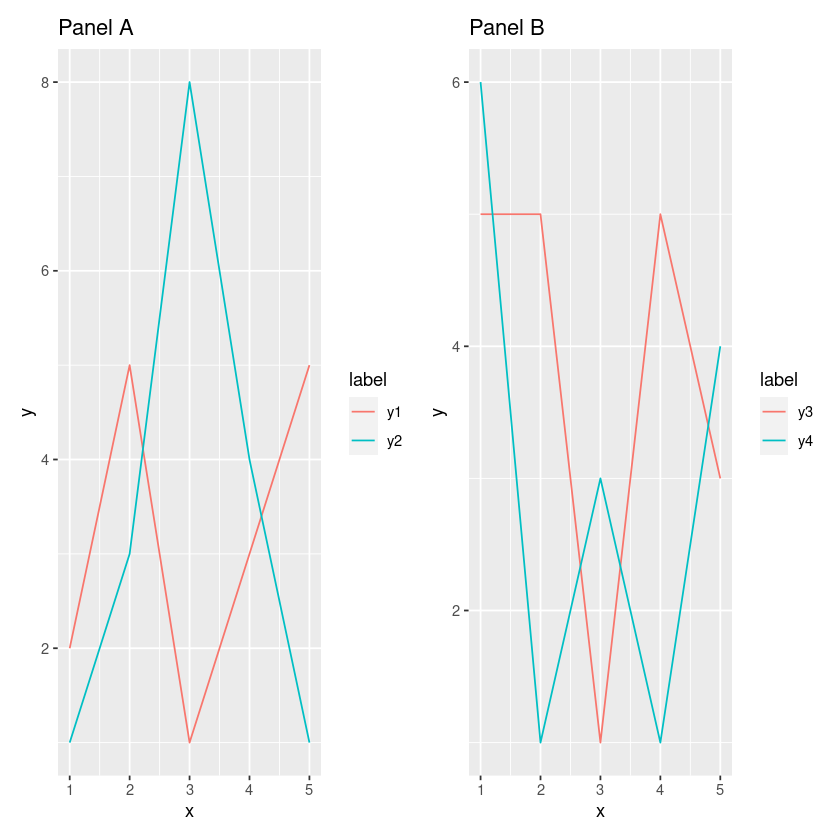

In [66]:
## 1枚目
p1 <- ggplot(data = subset(data_plot, label %in% c("y1", "y2")), aes(x = x, y = y, color = label)) +
    geom_line() +
    labs(title = "Panel A")

## 2枚目
p2 <- ggplot(data = subset(data_plot, label %in% c("y3", "y4")), aes(x = x, y = y, color = label)) +
    geom_line() +
    labs(title = "Panel B")

p1 + p2